In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_breast_cancer

In [ ]:
cmaps = ['Accent','Accent_r','Blues','Blues_r','BrBG','BrBG_r','BuGn','BuGn_r',' BuPu','BuPu_r','CMRmap','CMRmap_r','Dark2','Dark2_r','GnBu','GnBu_r','Greens','Greens_r','Greys','Greys_r','OrRd',' OrRd_r','Oranges','Oranges_r','PRGn','PRGn_r','Paired','Paired_r','Pastel1',' Pastel1_r','Pastel2','Pastel2_r','PiYG','PiYG_r','PuBu','PuBuGn','PuBuGn_r',' PuBu_r','PuOr','PuOr_r','PuRd','PuRd_r','Purples','Purples_r','RdBu','RdBu_r',' RdGy','RdGy_r','RdPu','RdPu_r','RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Reds',' Reds_r','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral','Spectral_r',' Wistia','Wistia_r','YlGn','YlGnBu','YlGnBu_r','YlGn_r','YlOrBr','YlOrBr_r','YlOrRd',' YlOrRd_r','afmhot','afmhot_r','autumn','autumn_r','binary','binary_r','bone',' bone_r','brg','brg_r','bwr','bwr_r','cividis','cividis_r','cool','cool_r','coolwarm','coolwarm_r','copper','copper_r',' cubehelix','cubehelix_r','flag','flag_r','gist_earth','gist_earth_r','gist_gray','gist_gray_r','gist_heat','gist_heat_r','gist_ncar','gist_ncar_r',' gist_rainbow','gist_rainbow_r','gist_stern','gist_stern_r','gist_yarg',' gist_yarg_r','gnuplot','gnuplot2','gnuplot2_r','gnuplot_r','gray','gray_r',' hot','hot_r','hsv','hsv_r','icefire','icefire_r','inferno',' inferno_r','magma','magma_r','mako','mako_r',' nipy_spectral','nipy_spectral_r','ocean','ocean_r','pink','pink_r',' plasma','plasma_r','prism','prism_r','rainbow','rainbow_r',' rocket','rocket_r','seismic','seismic_r','spring','spring_r',' summer','summer_r','tab10','tab10_r','tab20','tab20_r','tab20b',' tab20b_r','tab20c','tab20c_r','terrain','terrain_r','twilight',' twilight_r','twilight_shifted','twilight_shifted_r','viridis','viridis_r','vlag','vlag_r','winter','winter_r']

In [ ]:
breast_cancer = load_breast_cancer()

In [ ]:
X = breast_cancer.data[:, :2]
Y = breast_cancer.target

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
classificator_1 = svm.SVC(C = 0.01, kernel = 'rbf')
classificator_1.fit(X_train, Y_train)

SVC(C=0.01)

In [ ]:
classificator_1.score(X_train, Y_train)

0.6967032967032967

In [ ]:
classificator_1.score(X_test, Y_test)

0.6578947368421053

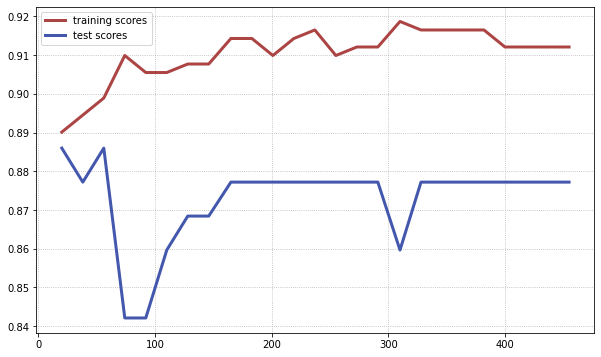

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 25):
    classificator_1 = svm.SVC(kernel='rbf')
    X = X_train[:int(i)]
    Y = Y_train[:int(i)]
    classificator_1.fit(X, Y)
    numbers.append(int(i))
    training_scores.append(classificator_1.score(X_train, Y_train))
    test_scores.append(classificator_1.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
plt.grid(linestyle=':')
plt.plot(numbers, training_scores, label="training scores", color  ='#AD4444', lw = 3)
plt.plot(numbers, test_scores, label = "test scores", color = '#4357AD', lw = 3)
plt.legend(loc = "best")
plt.show()

In [ ]:
methods = {'logistic regression': LogisticRegression(),
           'svc: linear kernel': svm.SVC(kernel = 'linear'),
           'svc: gauss kernel': svm.SVC(kernel = 'rbf'),
           'svc: poly kernel': svm.SVC(kernel = 'poly'),
           'k neighbours': KNeighborsClassifier(),
           'mlp': MLPClassifier()}

In [ ]:
def learning_curve_plot(n, method):
  training_scores = []
  test_scores = []
  numbers = []

  for i in np.linspace(20, len(X_train), 25):
    classificator_1 = methods[method]
    X = X_train[:int(i)]
    Y = Y_train[:int(i)]
    classificator_1.fit(X, Y)
    numbers.append(int(i))
    training_scores.append(classificator_1.score(X_train, Y_train))
    test_scores.append(classificator_1.score(X_test, Y_test))

  train_score = classificator_1.score(X_train, Y_train)
  test_score = classificator_1.score(X_test, Y_test)

  ax[n // 3][n % 3].plot(numbers, training_scores, label=f"training scores (score={np.round(train_score, 3)})", color = '#AD4444', lw = 3)
  ax[n // 3][n % 3].plot(numbers, test_scores, label=f"test scores (score={np.round(test_score, 3)})", color = '#4357AD', lw = 3)
  ax[n // 3][n % 3].set_title(f"{str.capitalize(method)}")
  ax[n // 3][n % 3].legend(loc="best")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

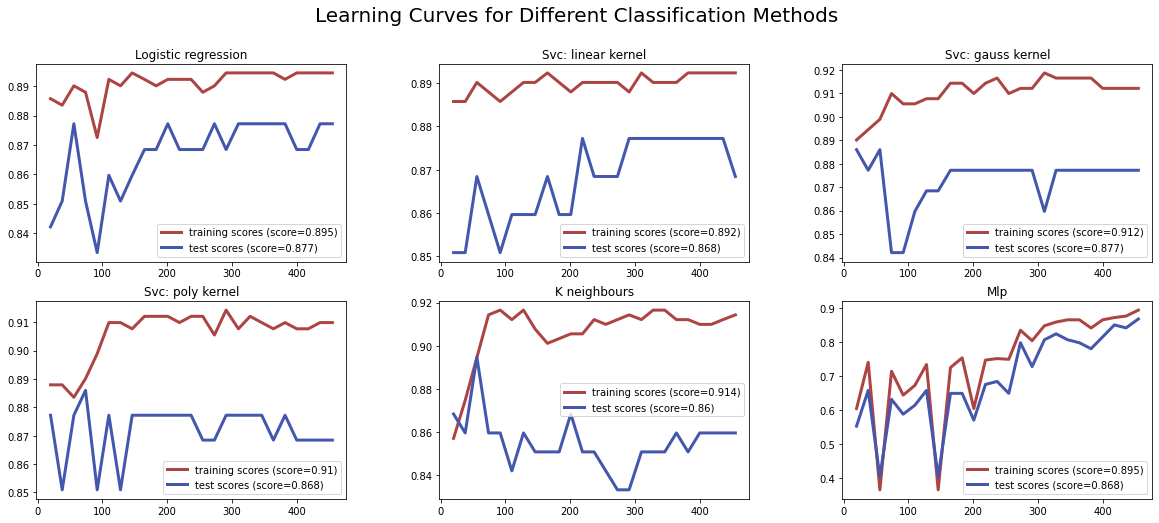

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (20,8))
plt.suptitle('Learning Curves for Different Classification Methods', fontsize=20)
plt.subplots_adjust(wspace = 0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)

In [ ]:
methods = {'svc: gauss kernel C1': svm.SVC(C = 0.0001),
          'svc: gauss kernel C2': svm.SVC(C = 0.01),
          'svc: gauss kernel C3': svm.SVC(C = 1),
          'svc: gauss kernel C4': svm.SVC(C = 100),
          'svc: gauss kernel C5': svm.SVC(C = 10000),
          'svc: gauss kernel C6': svm.SVC(C = 1000000)}

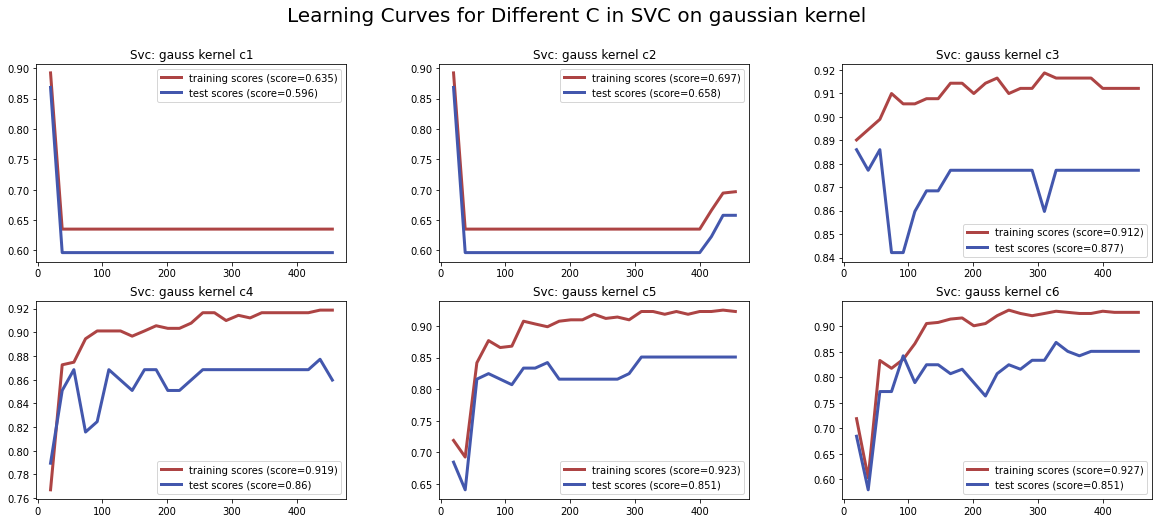

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (20, 8))
plt.suptitle('Learning Curves for Different C in SVC on gaussian kernel', fontsize = 20)
plt.subplots_adjust(wspace = 0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)

In [ ]:
methods = {'svc: gauss kernel C1': svm.SVC(C = 0.95),
           'svc: gauss kernel C2': svm.SVC(C = 0.98),
           'svc: gauss kernel C3': svm.SVC(C = 0.995),
           'svc: gauss kernel C4': svm.SVC(C = 1),
           'svc: gauss kernel C5': svm.SVC(C = 1.05),
           'svc: gauss kernel C6': svm.SVC(C = 1.1)}

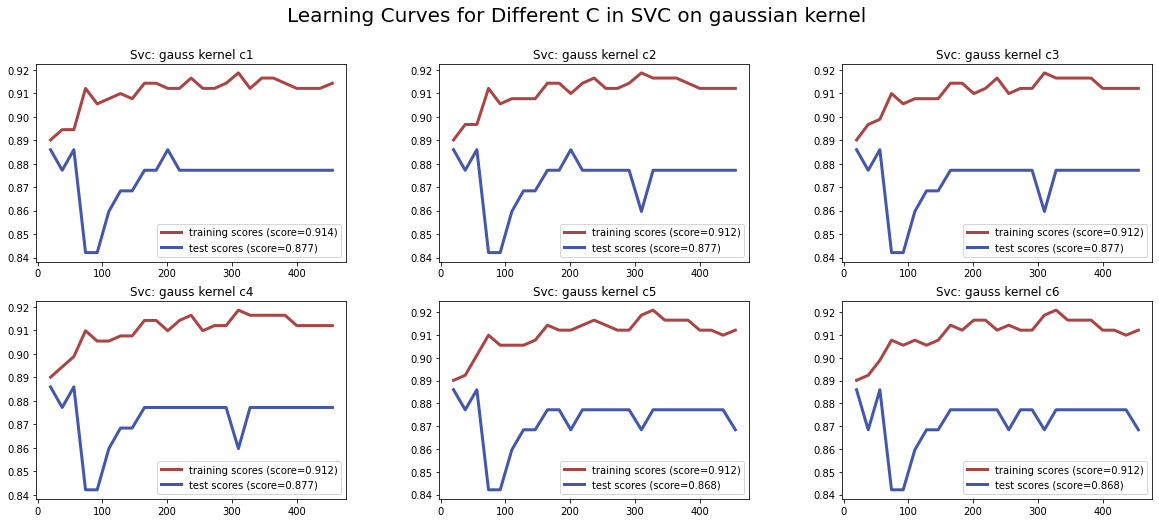

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (20, 8))
plt.suptitle('Learning Curves for Different C in SVC on gaussian kernel', fontsize=20)
plt.subplots_adjust(wspace = 0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)

In [ ]:
methods = {'svc: linear kernel C1': svm.SVC(C = 0.0001, kernel = 'linear'),
           'svc: linear kernel C2': svm.SVC(C = 0.01, kernel = 'linear'),
           'svc: linear kernel C3': svm.SVC(C = 1, kernel = 'linear'),
           'svc: linear kernel C4': svm.SVC(C = 100, kernel = 'linear'),
           'svc: linear kernel C5': svm.SVC(C = 10000, kernel = 'linear'),
           'svc: linear kernel C6': svm.SVC(C = 1000000, kernel = 'linear')}

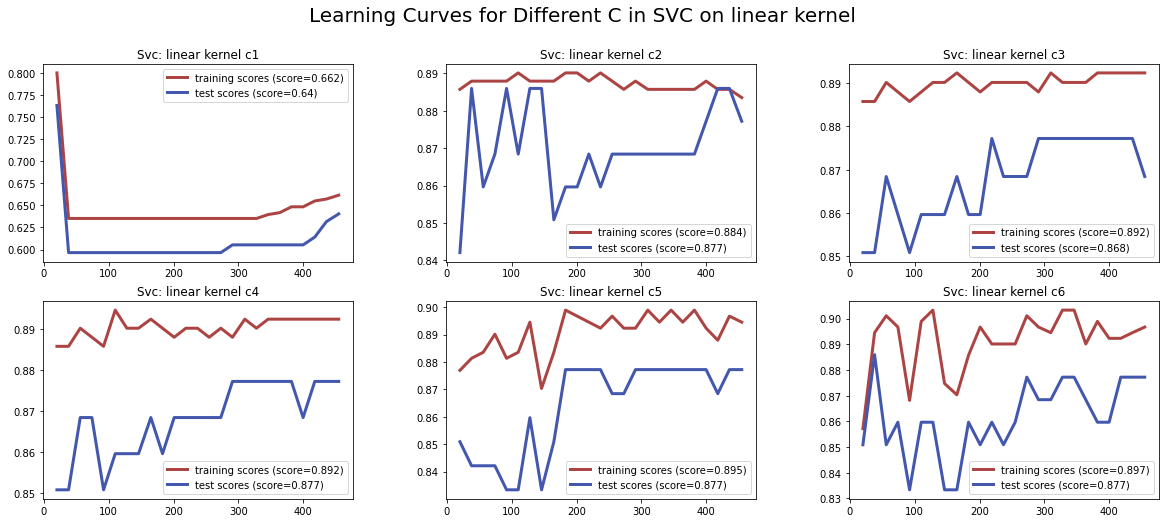

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (20, 8))
plt.suptitle('Learning Curves for Different C in SVC on linear kernel', fontsize=20)
plt.subplots_adjust(wspace = 0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)

In [ ]:
methods = {'svc: poly kernel C1': svm.SVC(C = 10, kernel = 'poly', degree = 3),
           'svc: poly kernel C2': svm.SVC(C = 10, kernel = 'poly', degree = 5),
           'svc: poly kernel C3': svm.SVC(C = 12, kernel = 'poly', degree = 3),
           'svc: poly kernel C4': svm.SVC(C = 12, kernel = 'poly', degree = 5),
           'svc: poly kernel C5': svm.SVC(C = 50, kernel = 'poly', degree = 3)}
#           'svc: poly kernel C6': svm.SVC(C = 50, kernel = 'poly', degree = 5)}

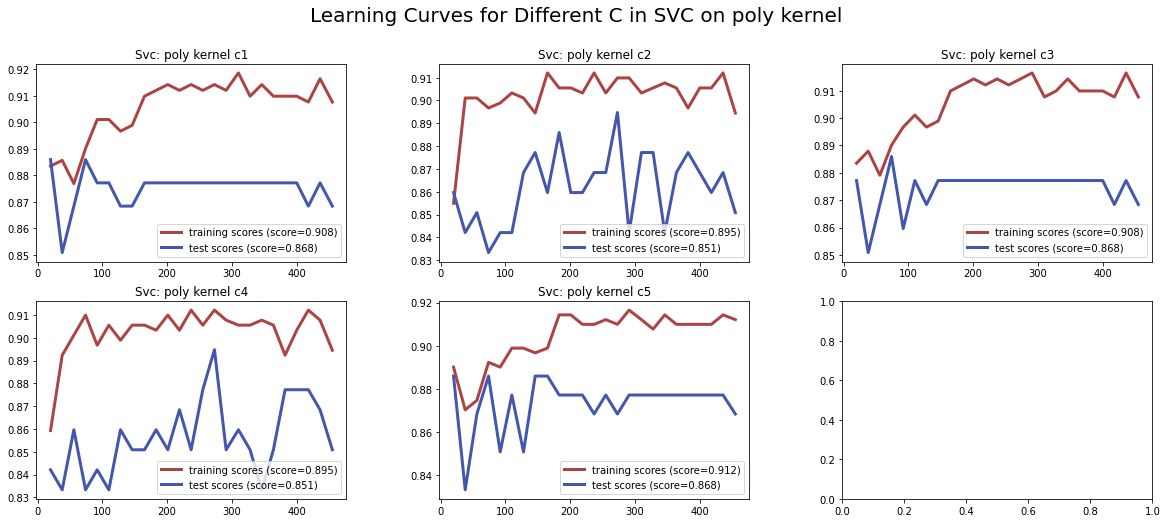

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (20,8))
plt.suptitle('Learning Curves for Different C in SVC on poly kernel', fontsize = 20)
plt.subplots_adjust(wspace = 0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)

Для линейного ядра оптимально С = 10000
Для гауссового ядра оптимально С = 100
